# Exercise 2: Relation between multiplicative and additive rotational increments

In this example we want to show the relation between multiplicative and additive rotational increments.
We start of with a rotation vector $\psi_1 = [1,1/2,1/3]$ and the corresponding triad $\Lambda_1=\Lambda(\psi_1)$.
This vector is now incremented by an additive increment $\Delta \psi = [1/2,0,1/2]$.
The compound triad is calculated with $\Lambda_2 = \Lambda(\psi_1 + \Delta \psi)$:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from meshpy import Rotation

psi_1 = np.array([1, 1 / 2, 1 / 3])
rotation_1 = Rotation.from_rotation_vector(psi_1)

delta_psi = np.array([1 / 2, 0, 1 / 2])
rotation_2 = Rotation.from_rotation_vector(psi_1 + delta_psi)
print(rotation_2.get_rotation_matrix())

[[ 0.64083668 -0.17014949  0.74858366]
 [ 0.74058534 -0.11974446 -0.66120694]
 [ 0.20214277  0.97811575  0.04927357]]


Now we want to get the corresponding multiplicative increment $\Delta \theta$, such that, $\Lambda_2 = \Lambda(\psi_1 + \Delta \psi) = \Lambda(\Delta \theta) \Lambda_1$. This can be done by extracting the rotation vector from the triad $\Lambda_\theta = \Lambda(\Delta \theta) = \Lambda_2 \Lambda_1^T$:

In [12]:
rotation_21 = rotation_2 * rotation_1.inv()
delta_theta = rotation_21.get_rotation_vector()
print(delta_theta)

[ 0.61541061 -0.07052596  0.31266401]


We observe that $\Delta \theta \ne \Delta \psi$.

From the theory or large rotations, we know that the additive and multiplicative increments can be related by the transformation matrix $T$:

In [18]:
T_times_delta_psi = np.dot(rotation_1.get_transformation_matrix(), delta_psi)
print(T_times_delta_psi)

[0.37381546 0.19509573 0.58591004]


This is obviously not equal to the _exact_ multiplicative increment $\Delta \theta$, since the transformation matrix can only be applied to infinitesimal increments. 

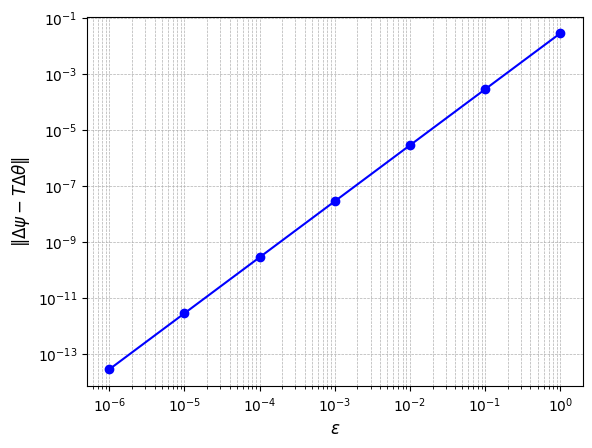

In [43]:
def multiplicative_increment_difference(eps):
    rotation_2 = Rotation.from_rotation_vector(psi_1 + eps * delta_psi)
    rotation_21 = rotation_2 * rotation_1.inv()
    delta_theta = rotation_21.get_rotation_vector()
    T_times_delta_psi = np.dot(
        rotation_1.get_transformation_matrix_inv(), eps * delta_psi
    )
    return delta_theta - T_times_delta_psi


eps_orders = [0, -1, -2, -3, -4, -5, -6]
eps_values = [10**order for order in eps_orders]
difference = [
    np.linalg.norm(multiplicative_increment_difference(eps)) for eps in eps_values
]

plt.plot(eps_values, difference, marker="o", linestyle="-", color="blue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\epsilon$", fontsize=12)
plt.ylabel(r"$\|\Delta \psi - T \Delta\theta \|$", fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

We can see that the difference between $T \Delta \theta$ and $\Delta \psi$ goes to 0 as the magnitude of the rotational increment decreases.